<a href="https://colab.research.google.com/github/jaisidhsingh/FashionMNISTClassifier/blob/main/fashion_mnist1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import tensorflow as tf
from tensorflow import keras as keras
from keras import layers, backend, datasets, models
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

pred_ref = []
pred_ref = y_test 

In [58]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Ankle boot
Pullover
Trouser
Trouser


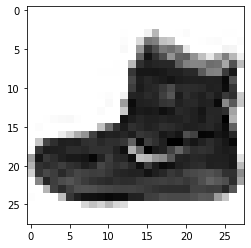

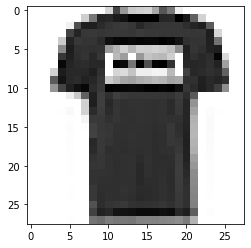

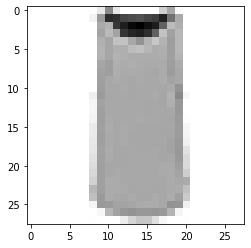

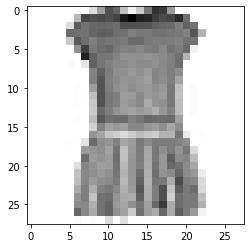

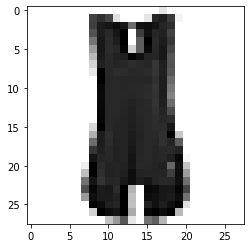

In [59]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for n in range(4):
  print(classes[pred_img[n]])

for i in range(5):
  plt.imshow(X_train[i], cmap = plt.cm.binary)
  plt.show()

In [60]:
img_rows = 28
img_cols = 28

#acknowledge image format
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#transform images
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print("Input shape: ", input_shape)

num_category = 10
#convert to categories
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

X_train shape: (60000, 28, 28, 1)
Input shape:  (28, 28, 1)


In [61]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 64)               

In [62]:
num_epochs = 20
batch_size = 64

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=1, validation_data=(X_test, y_test))


Epoch 1/20
938/938 [==============================] - 4s 4ms/step - loss: 0.7391 - accuracy: 0.7293 - val_loss: 0.4727 - val_accuracy: 0.8300
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.4221 - accuracy: 0.8455 - val_loss: 0.4213 - val_accuracy: 0.8486
Epoch 3/20
938/938 [==============================] - 3s 4ms/step - loss: 0.3763 - accuracy: 0.8615 - val_loss: 0.3883 - val_accuracy: 0.8609
Epoch 4/20
938/938 [==============================] - 3s 4ms/step - loss: 0.3535 - accuracy: 0.8713 - val_loss: 0.4751 - val_accuracy: 0.8286
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.3364 - accuracy: 0.8758 - val_loss: 0.4066 - val_accuracy: 0.8542
Epoch 6/20
938/938 [==============================] - 3s 4ms/step - loss: 0.3233 - accuracy: 0.8800 - val_loss: 0.3571 - val_accuracy: 0.8721
Epoch 7/20
938/938 [==============================] - 3s 4ms/step - loss: 0.3022 - accuracy: 0.8904 - val_loss: 0.4172 - val_accuracy: 0.8535
Epoch 

In [63]:
acc = model.evaluate(X_test, y_test, verbose=0)
print("Loss : ", acc[0])
print("Accuracy : ", acc[1])

pred = model.predict(X_test)
pred_img = np.argmax(pred, axis=-1)

#reshape to make predictions
X_test = X_test.reshape(10000, img_rows, img_cols)


Loss :  0.3675561547279358
Accuracy :  0.882099986076355


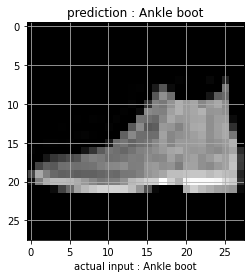

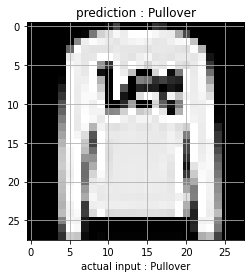

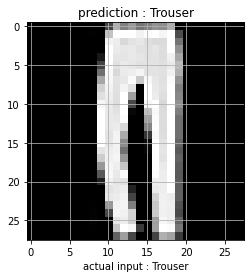

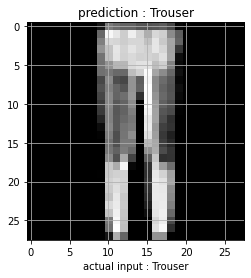

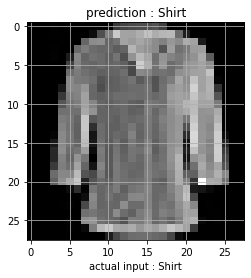

In [64]:
#show predictions
for i in range(0, 5):
	plt.grid()
	plt.imshow(X_test[i], cmap='gray')
	plt.xlabel(f"actual input : {classes[pred_ref[i]]}")
	plt.title(f"prediction : {str(classes[pred_img[i]])}")
	plt.show()